In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get a list of all Excel files in the directory
excel_files = [f for f in os.listdir() if f.endswith('.xlsx')]

# Convert each Excel file into multiple CSV files
for excel_file in excel_files:
    # Load spreadsheet
    xl = pd.ExcelFile(excel_file)

    # Load a sheet into a DataFrame by its name
    for sheet_name in xl.sheet_names:
        df = xl.parse(sheet_name)
        df = df.iloc[:, :10]

        # Write DataFrame to a CSV file
        df.to_csv(f'{sheet_name}.csv', index=False)

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

# Read each CSV file and store the data in a dictionary
data = {}
for csv_file in csv_files:
    data[csv_file] = pd.read_csv(csv_file)


In [3]:
# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

# Separate 'Floral Cost.csv' and 'Hardgood Costs.csv' from the other CSV files
arrangement_csv_files = [f for f in csv_files if f not in ['Floral Costs.csv', 'Hardgood Costs.csv']]

# Create separate dictionaries for floral cost, hardgood costs, and other data
floral_costs_data = {}
hardgood_costs_data = {}
data = {}
# Process 'Floral Cost.csv' and 'Hardgood Costs.csv'
for csv_file in ['Floral Costs.csv', 'Hardgood Costs.csv']:
    df = pd.read_csv(csv_file, header=None)  # No header
    # Store the data in the appropriate dictionary
    if csv_file == 'Floral Costs.csv':
        floral_costs_data[csv_file] = df
    else:
        hardgood_costs_data[csv_file] = df

for csv_file in arrangement_csv_files:
    df = pd.read_csv(csv_file, header=None)
    df.columns = ['Colors', 'Flowers', 'SQty', 'SPrice', 'DQty','DPrice','PQty','PPrice','EQty','EPrice']
    df = df.iloc[23:36]
    data[csv_file] = df

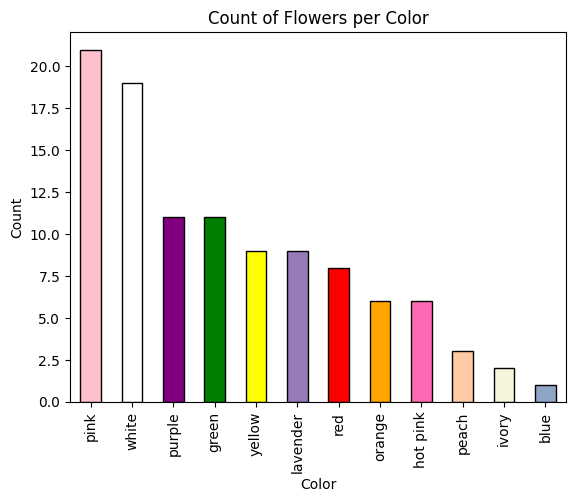

In [4]:
# Concatenate all dataframes in the dictionary into a single dataframe
# Create a new column 'Arrangement' which is the key in the dictionary
all_data = pd.concat([df.assign(Arrangement=os.path.splitext(name)[0]) for name, df in data.items()])


# Convert the color names to lowercase
all_data['Colors'] = all_data['Colors'].str.lower()
all_data['Colors'] = all_data['Colors'].str.strip()
# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Count the number of flowers per color
color_counts = all_data['Colors'].value_counts()
color_names = color_counts.index

# Plot the bar chart with custom colors and outline
color_counts.plot(kind='bar', color=[custom_colors.get(c, 'gray') for c in color_names], edgecolor='black')

plt.title('Count of Flowers per Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


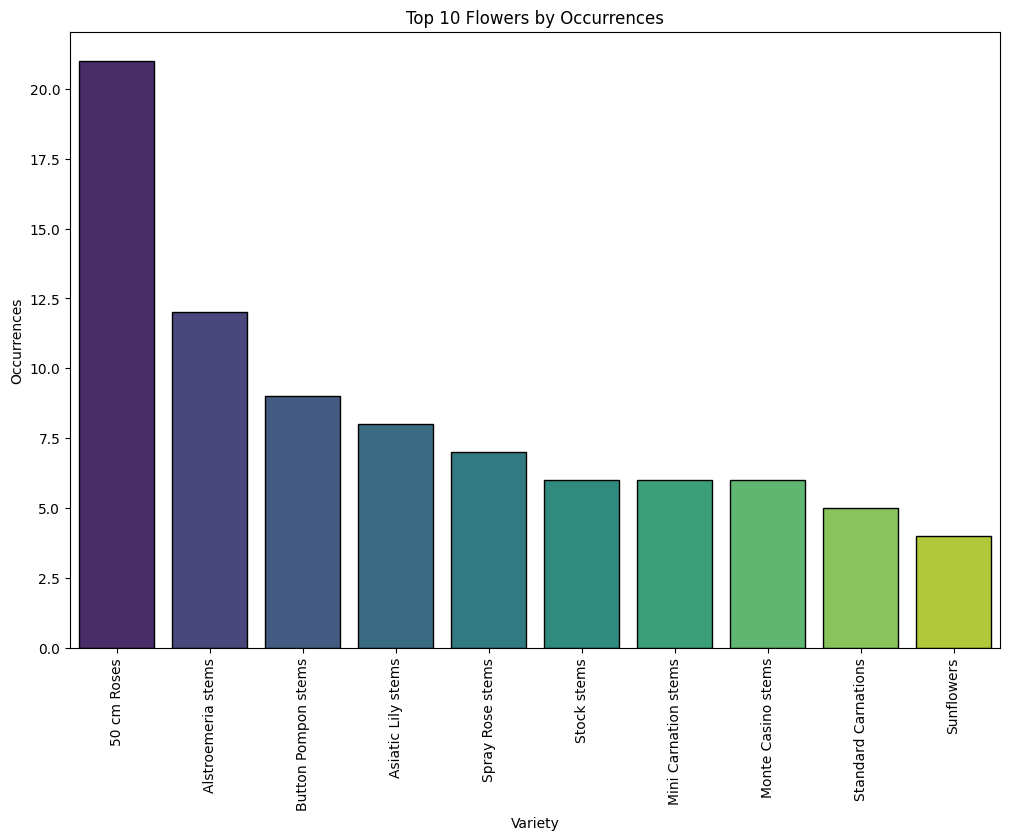

In [5]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each flower variety
variety_counts = all_data['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


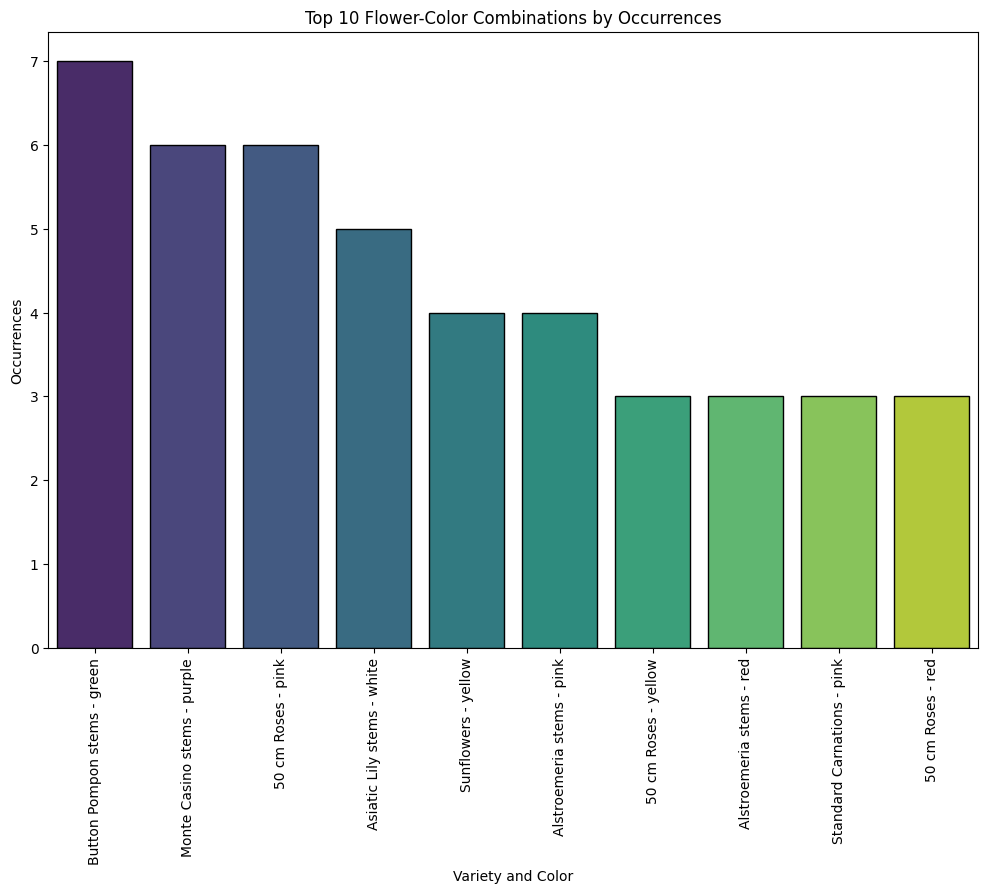

In [6]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each unique combination of 'Flowers' and 'Colors'
variety_color_counts = all_data.groupby(['Flowers', 'Colors']).size()

# Select the top 10 combinations
top_varieties_colors = variety_color_counts.sort_values(ascending=False).head(10)

# Convert the MultiIndex to a single index by joining the levels with a separator
top_varieties_colors.index = top_varieties_colors.index.map(' - '.join)

# Create a bar plot for the top 10 combinations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties_colors.index, y=top_varieties_colors.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flower-Color Combinations by Occurrences')
plt.xlabel('Variety and Color')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


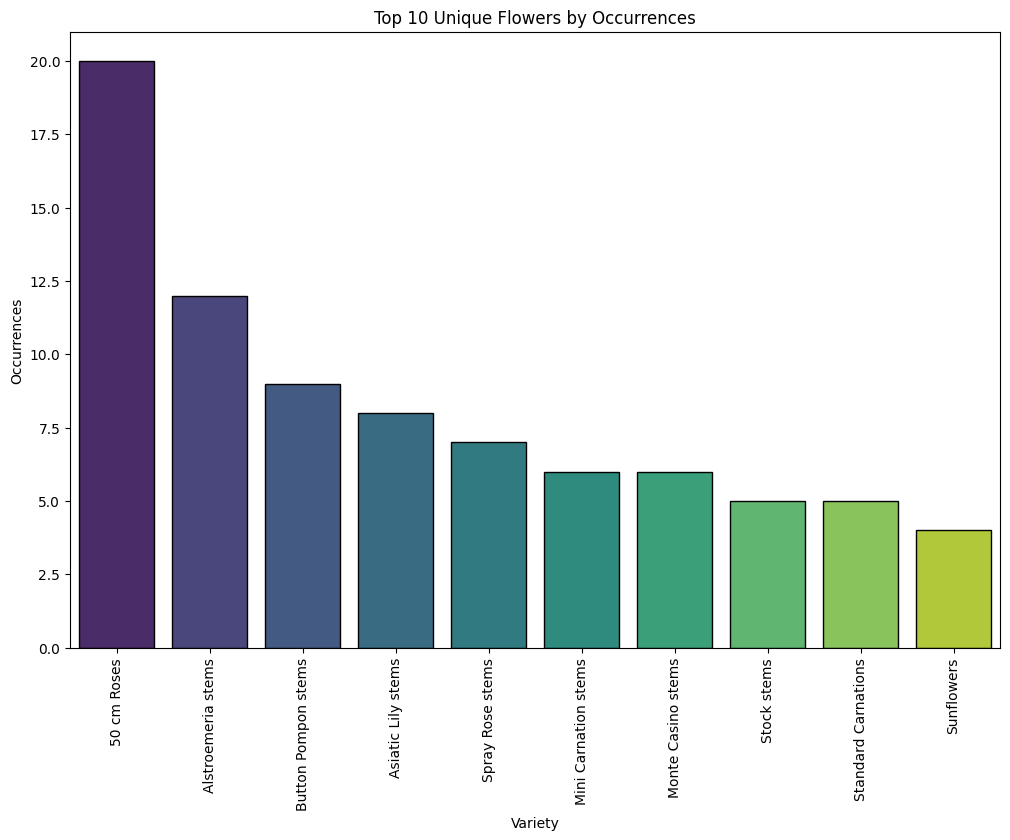

In [7]:
# Drop duplicates based on 'Arrangement' and 'Flowers'
all_data_unique_flowers = all_data.drop_duplicates(subset=['Arrangement', 'Flowers'])

# Count the occurrences of each 'Flowers' type
variety_counts = all_data_unique_flowers['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Unique Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


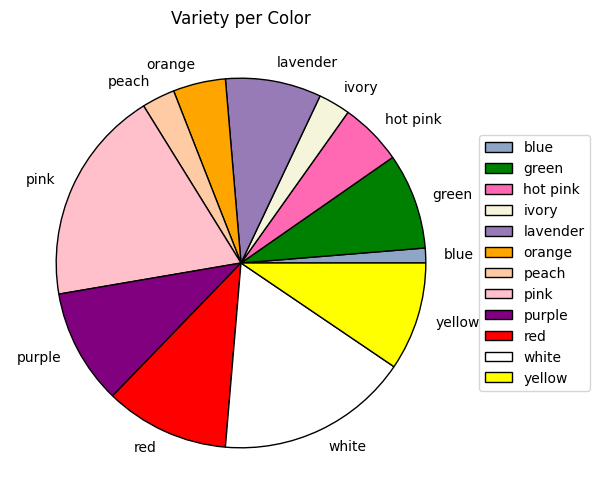

In [8]:
all_data['Colors'] = all_data['Colors'].str.lower()
all_data['Colors'] = all_data['Colors'].str.strip()
# Remove rows with NaN values in the 'Colors' column
all_data = all_data[all_data['Colors'].notna()]

# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()


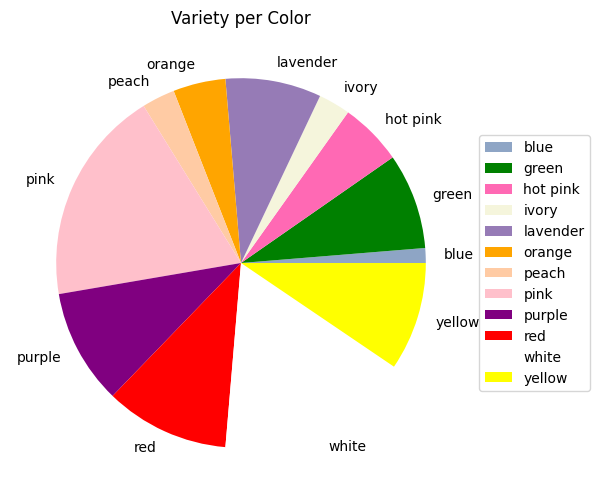

In [9]:
# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()


In [10]:
rank = [
'BF89-11K',
'BF216-11KM',
'BF375-11KM',
'TEV55-6',
'T46-1',
'TEV25-3',
'BF116-11KM',
'T37-1',
'BF761-11KM',
'T43-1',
'T55-2',
'BF335-11KM-2',
'TBC03-1-2',
'FTD-14-M6',
'BF224-11K',
'BF82-11K',
'T21S100',
'TEV12-4',
'BF377-11K',
'T17M200-2',
'FYF-893',
'BF167-11KM',
'BF52-11KM',
'T18M100',
'BN29-31J']

In [11]:
# Convert the ranking list into a DataFrame
rank_df = pd.DataFrame(rank, columns=['Arrangement'])
rank_df['Rank'] = rank_df.index + 1  # Add a 'Rank' column
# Merge the ranking with the existing data
all_data_ranked = pd.merge(all_data, rank_df, on='Arrangement', how='left')

In [12]:
# Filter the data to include only the top 10 arrangements
top_10 = all_data[all_data['Arrangement'].isin(rank[:10])]

# Drop duplicates to ensure each flower type is counted only once per arrangement
top_10_unique_flowers = top_10.drop_duplicates(subset=['Arrangement', 'Flowers'])

# Count the occurrences of each color and flower type
color_counts = top_10['Colors'].value_counts()
flower_counts = top_10_unique_flowers['Flowers'].value_counts()

print("Most common colors among top 10 arrangements:")
print(color_counts)
print("\nMost common flower types among top 10 arrangements:")
print(flower_counts)


Most common colors among top 10 arrangements:
Colors
white       10
pink         7
red          6
yellow       4
purple       3
peach        3
green        2
orange       2
hot pink     2
blue         1
ivory        1
Name: count, dtype: int64

Most common flower types among top 10 arrangements:
Flowers
50 cm Roses                     10
Mini Carnation stems             5
Asiatic Lily stems               4
Alstroemeria stems               3
Spray Rose stems                 3
Monte Casino stems               2
Button Pompon stems              2
Standard Carnations              2
Sunflowers                       1
Double Lisianthus stems          1
Delphinium stems, Belladonna     1
Matsumoto Aster stems            1
Stock stems                      1
Echevaria Succulent              1
Daisy Pompon stems               1
Waxflower stems                  1
Name: count, dtype: int64


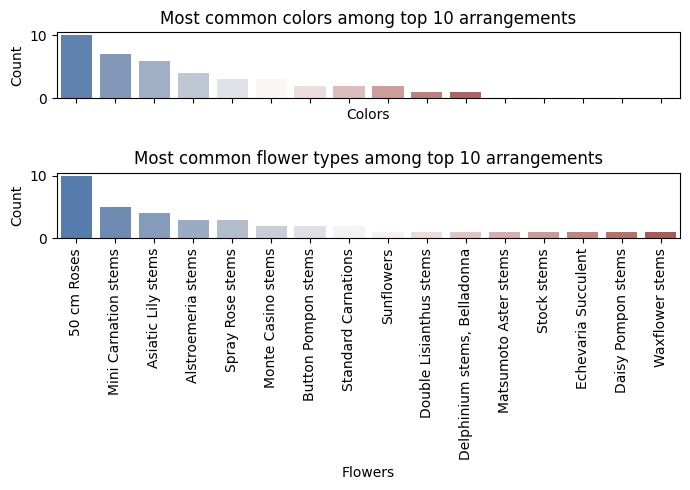

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Generate a bar plot for the most common colors among top 10 arrangements
sns.barplot(x=color_counts.index, y=color_counts.values, palette="vlag", ax=axes[0])
axes[0].set_ylabel('Count')
axes[0].set_title('Most common colors among top 10 arrangements')

# Generate a bar plot for the most common flower types among top 10 arrangements
sns.barplot(x=flower_counts.index, y=flower_counts.values, palette="vlag", ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].set_title('Most common flower types among top 10 arrangements')

# Rotate x-axis labels for better readability
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout(h_pad=2)

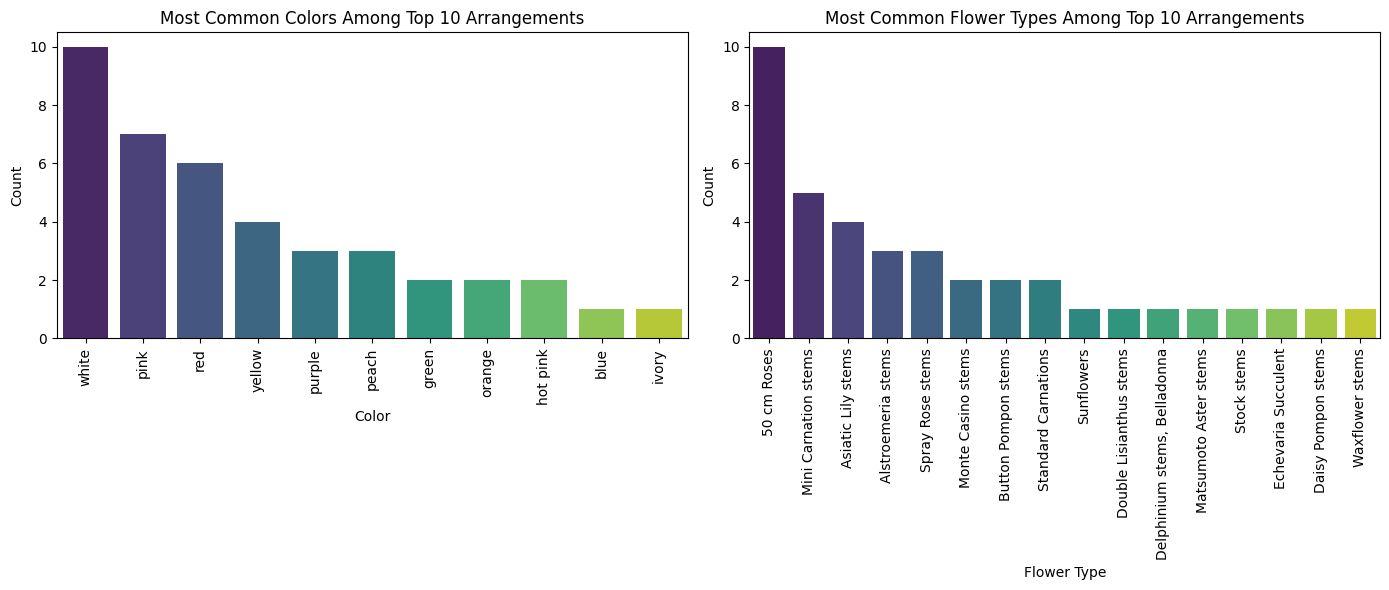

In [14]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create a bar plot for the most common colors
plt.subplot(1, 2, 1)
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.title('Most Common Colors Among Top 10 Arrangements')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Create a bar plot for the most common flower types
plt.subplot(1, 2, 2)
sns.barplot(x=flower_counts.index, y=flower_counts.values, palette='viridis')
plt.title('Most Common Flower Types Among Top 10 Arrangements')
plt.xlabel('Flower Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

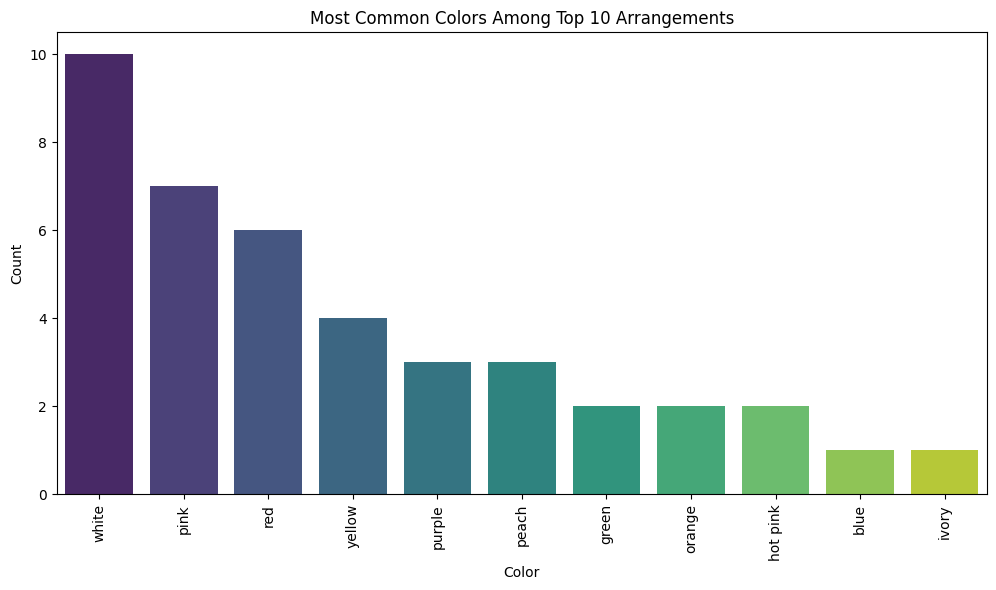

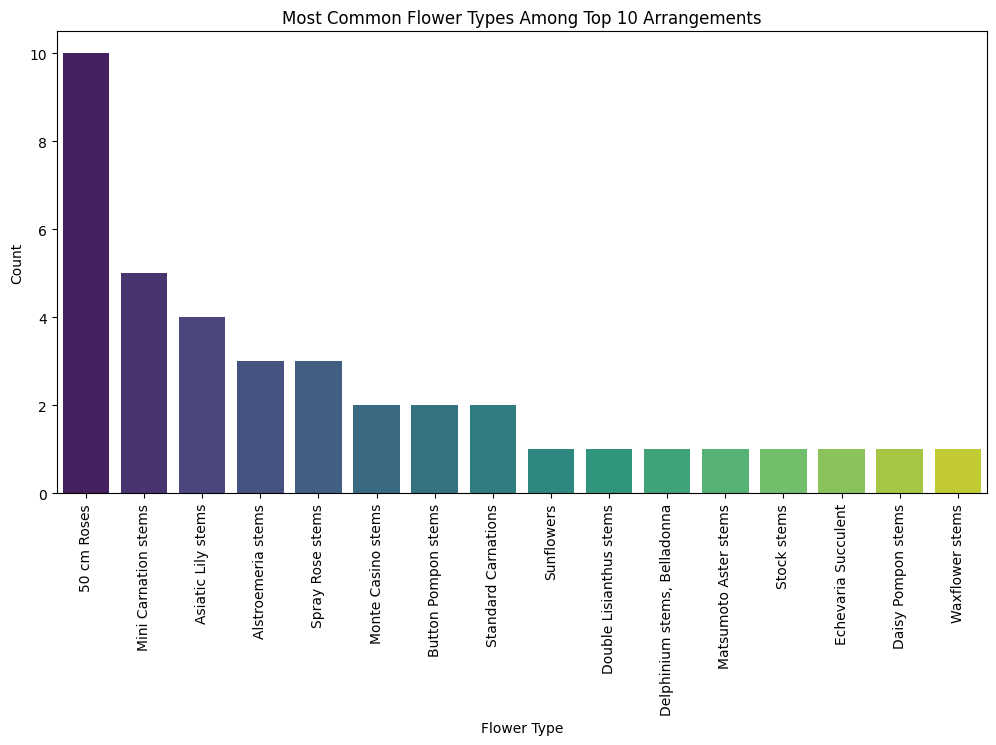

In [15]:
# Create a bar plot for the most common colors
plt.figure(figsize=(12, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.title('Most Common Colors Among Top 10 Arrangements')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot for the most common flower types
plt.figure(figsize=(12, 6))
sns.barplot(x=flower_counts.index, y=flower_counts.values, palette='viridis')
plt.title('Most Common Flower Types Among Top 10 Arrangements')
plt.xlabel('Flower Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

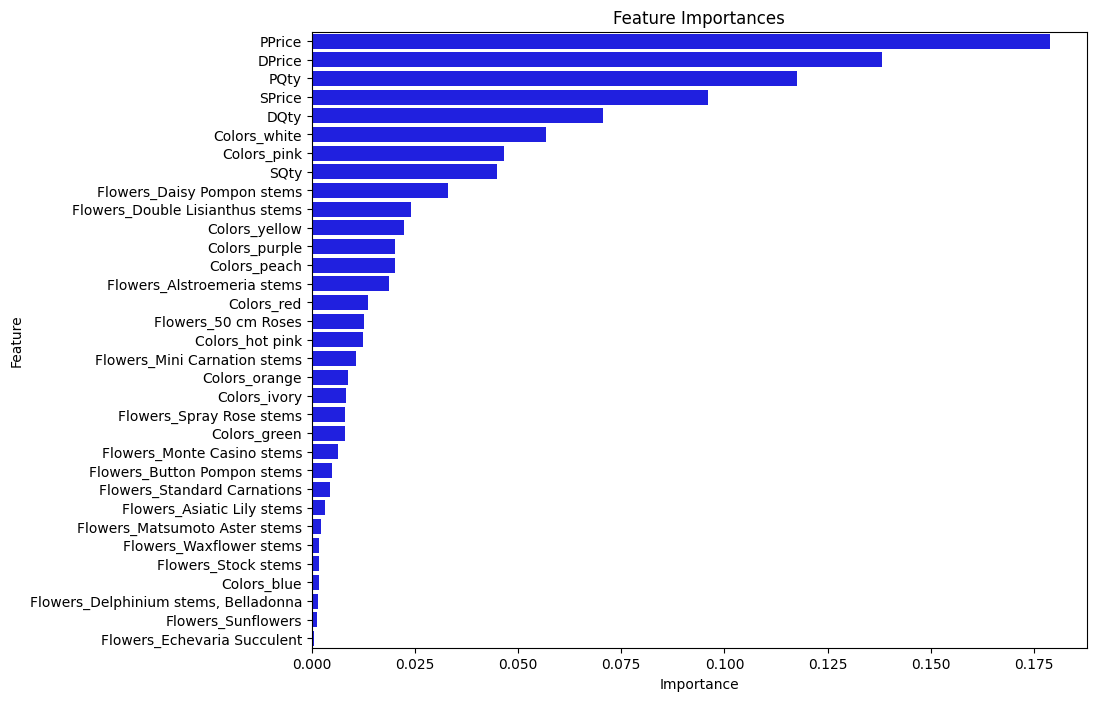

In [17]:
# Filter the top 10 arrangements
top_10 = all_data_ranked[all_data_ranked['Rank'] <= 10]

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(top_10[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Colors', 'Flowers']))

# Concatenate the encoded data with the original DataFrame
top_10_encoded = pd.concat([top_10.drop(['Colors', 'Flowers'], axis=1).reset_index(drop=True), encoded_df], axis=1)

# Separate target variable and features
y = top_10_encoded['Rank']
X = top_10_encoded.drop(['Rank', 'Arrangement'], axis=1)
X = X.drop(['EQty', 'EPrice'], axis=1)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, color='b')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [18]:
# Select only the columns corresponding to 'Flowers' and 'Colors'
X = top_10_encoded.filter(regex='Flowers|Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sum the importances of the binary columns corresponding to each unique flower and color
flower_importances = importances_df[importances_df['Feature'].str.startswith('Flowers')].sum()
color_importances = importances_df[importances_df['Feature'].str.startswith('Colors')].sum()

print("Importance of Flowers: ", flower_importances)
print("Importance of Colors: ", color_importances)


Importance of Flowers:  Feature       Flowers_50 cm RosesFlowers_Alstroemeria stemsF...
Importance                                             0.607508
dtype: object
Importance of Colors:  Feature       Colors_blueColors_greenColors_hot pinkColors_i...
Importance                                             0.392492
dtype: object


                                 Feature  Importance
4             Flowers_Daisy Pompon stems    0.239270
12           Flowers_Standard Carnations    0.108975
6        Flowers_Double Lisianthus stems    0.097506
9           Flowers_Mini Carnation stems    0.077052
15               Flowers_Waxflower stems    0.076144
2             Flowers_Asiatic Lily stems    0.075171
10            Flowers_Monte Casino stems    0.056880
11              Flowers_Spray Rose stems    0.056729
1             Flowers_Alstroemeria stems    0.055098
0                    Flowers_50 cm Roses    0.046132
3            Flowers_Button Pompon stems    0.033169
5   Flowers_Delphinium stems, Belladonna    0.032794
14                    Flowers_Sunflowers    0.021241
7            Flowers_Echevaria Succulent    0.008777
13                   Flowers_Stock stems    0.008298
8          Flowers_Matsumoto Aster stems    0.006765


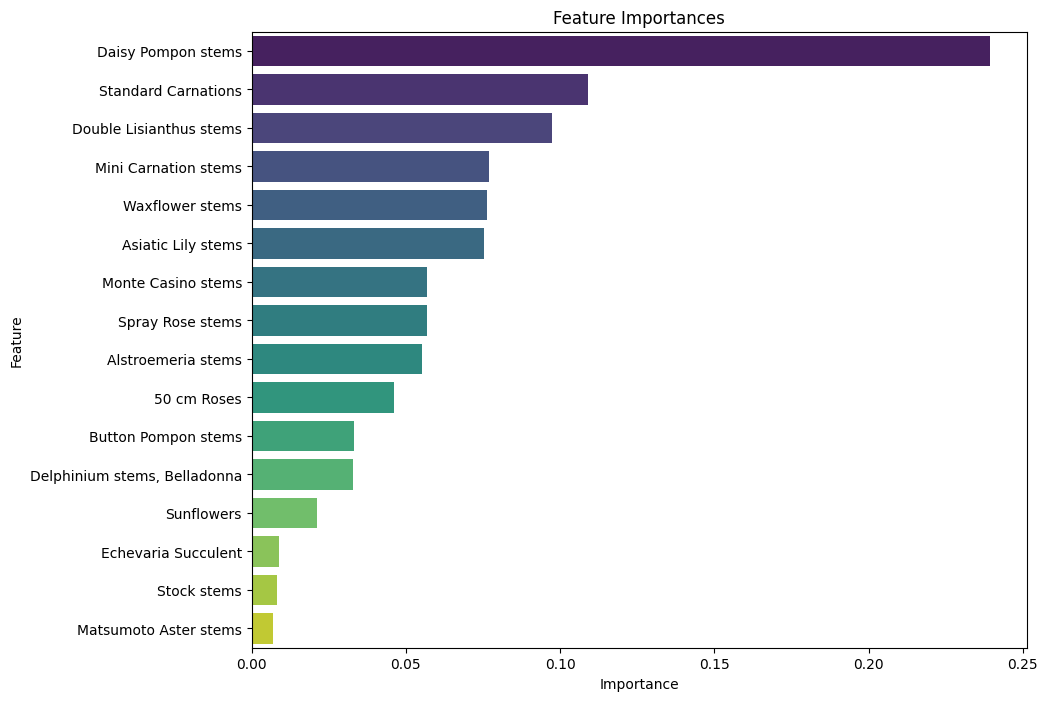

In [19]:
# Select only the columns corresponding to 'Flowers'
X_flowers = top_10_encoded.filter(regex='Flowers')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_flowers_imputed = imputer.fit_transform(X_flowers)

# Create a DataFrame from the imputed data
X_flowers_imputed_df = pd.DataFrame(X_flowers_imputed, columns=X_flowers.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_flowers_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_flowers.columns,
    'Importance': importances
})

# Print the importances of each unique flower
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Flowers_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Flowers_', '')

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


            Feature  Importance
7     Colors_purple    0.294524
9      Colors_white    0.171891
10    Colors_yellow    0.116178
6       Colors_pink    0.101725
0       Colors_blue    0.074137
1      Colors_green    0.072831
8        Colors_red    0.066960
5      Colors_peach    0.063751
3      Colors_ivory    0.015223
2   Colors_hot pink    0.011738
4     Colors_orange    0.011041


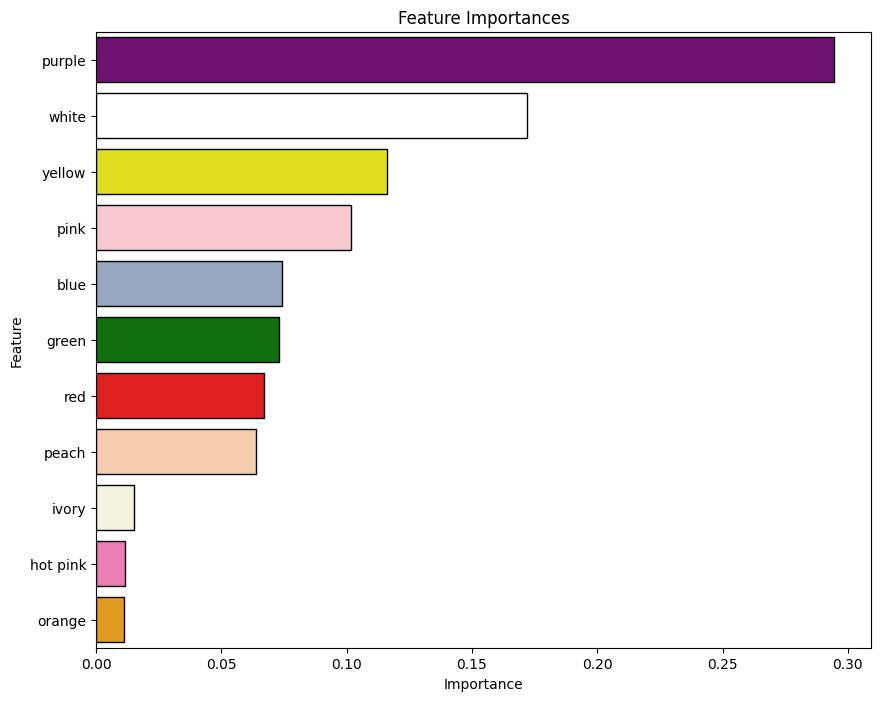

In [20]:
# Select only the columns corresponding to 'Colors'
X_colors = top_10_encoded.filter(regex='Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_colors_imputed = imputer.fit_transform(X_colors)

# Create a DataFrame from the imputed data
X_colors_imputed_df = pd.DataFrame(X_colors_imputed, columns=X_colors.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_colors_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_colors.columns,
    'Importance': importances
})

# Print the importances of each unique color
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Colors_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Colors_', '')

# Create a list of colors for the barplot
colors = [custom_colors.get(feature, 'gray') for feature in importances_df_sorted['Feature']]

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette=colors, edgecolor='black')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [21]:
# Select all arrangements instead of just the top 10
all_arrangements = all_data_ranked

# Create a DataFrame with unique flowers and colors for each arrangement
all_arrangements_unique = all_arrangements.groupby('Arrangement').agg({'Flowers': 'nunique', 'Colors': 'nunique'}).reset_index()

# Encode the categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(all_arrangements_unique[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Colors', 'Flowers']))

# Concatenate the encoded data with the original DataFrame
all_arrangements_encoded = pd.concat([all_arrangements_unique.drop(['Colors', 'Flowers'], axis=1), encoded_df], axis=1)
# Drop the 'Arrangement' column
all_arrangements_encoded = all_arrangements_encoded.drop('Arrangement', axis=1)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(all_arrangements_encoded)

# Create a DataFrame from the imputed data
all_arrangements_imputed = pd.DataFrame(imputed_data, columns=all_arrangements_encoded.columns)

# Create a new target variable that only contains the ranks for the 24 arrangements in 'all_arrangements_imputed'
y = all_arrangements.loc[all_arrangements_imputed.index, 'Rank']

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(all_arrangements_imputed, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame of feature importances
importances_df = pd.DataFrame({'Feature': all_arrangements_imputed.columns, 'Importance': importances})

# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importances_df_sorted)


      Feature  Importance
3    Colors_4    0.209160
2    Colors_3    0.159074
1    Colors_2    0.119454
4    Colors_5    0.117340
8   Flowers_5    0.098070
6   Flowers_3    0.068442
9   Flowers_6    0.065292
5   Flowers_2    0.057574
0    Colors_1    0.053106
7   Flowers_4    0.048964
10  Flowers_7    0.003524


In [22]:
# Print categories for 'Colors'
print("Colors categories:")
for i, category in enumerate(encoder.categories_[0]):
    print(f"Colors_{i+1}: {category}")

# Print categories for 'Flowers'
print("\nFlowers categories:")
for i, category in enumerate(encoder.categories_[1]):
    print(f"Flowers_{i+1}: {category}")


Colors categories:
Colors_1: 1
Colors_2: 2
Colors_3: 3
Colors_4: 4
Colors_5: 5

Flowers categories:
Flowers_1: 2
Flowers_2: 3
Flowers_3: 4
Flowers_4: 5
Flowers_5: 6
Flowers_6: 7


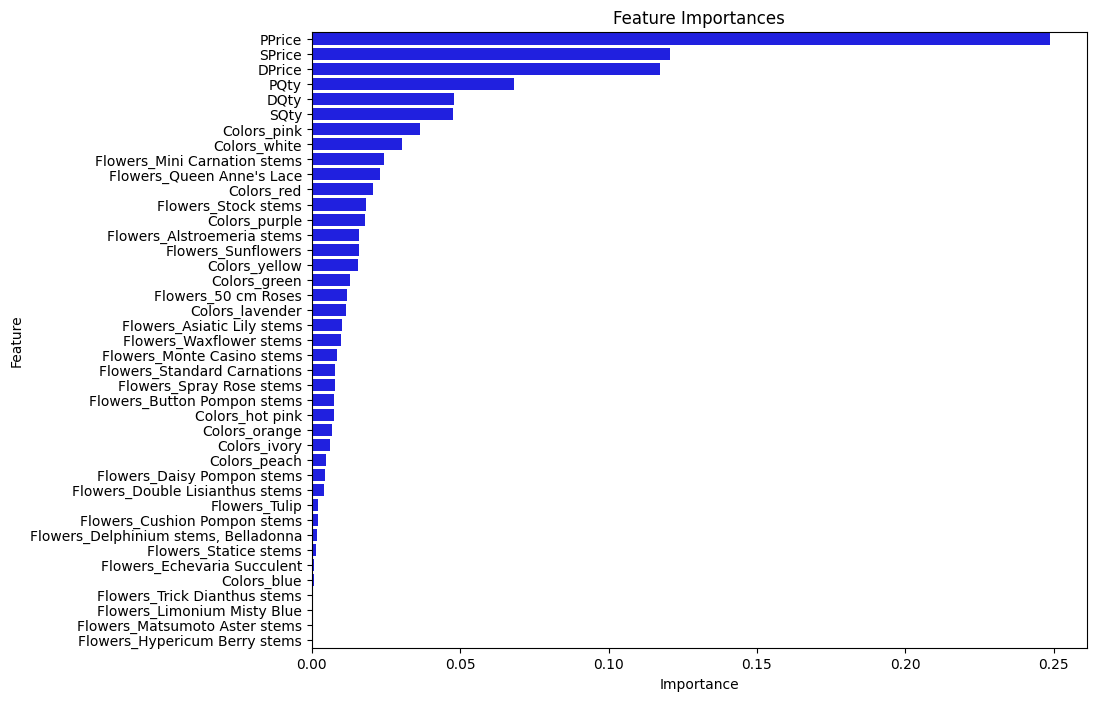

In [23]:
# Filter the top 10 arrangements
top_25 = all_data_ranked[all_data_ranked['Rank'] <= 25]

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(top_25[['Colors', 'Flowers']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Colors', 'Flowers']))

# Concatenate the encoded data with the original DataFrame
top_25_encoded = pd.concat([top_25.drop(['Colors', 'Flowers'], axis=1).reset_index(drop=True), encoded_df], axis=1)

# Separate target variable and features
y = top_25_encoded['Rank']
X = top_25_encoded.drop(['Rank', 'Arrangement'], axis=1)
X = X.drop(['EQty', 'EPrice'], axis=1)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, color='b')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
# Select only the columns corresponding to 'Flowers' and 'Colors'
X = top_25_encoded.filter(regex='Flowers|Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Create a DataFrame from the imputed data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sum the importances of the binary columns corresponding to each unique flower and color
flower_importances = importances_df[importances_df['Feature'].str.startswith('Flowers')].sum()
color_importances = importances_df[importances_df['Feature'].str.startswith('Colors')].sum()

print("Importance of Flowers: ", flower_importances)
print("Importance of Colors: ", color_importances)


Importance of Flowers:  Feature       Flowers_50 cm RosesFlowers_Alstroemeria stemsF...
Importance                                             0.583159
dtype: object
Importance of Colors:  Feature       Colors_blueColors_greenColors_hot pinkColors_i...
Importance                                             0.416841
dtype: object


                                 Feature  Importance
0                    Flowers_50 cm Roses    0.110768
12          Flowers_Mini Carnation stems    0.105052
22               Flowers_Waxflower stems    0.069783
2             Flowers_Asiatic Lily stems    0.062935
3            Flowers_Button Pompon stems    0.060139
6   Flowers_Delphinium stems, Belladonna    0.058851
14             Flowers_Queen Anne's Lace    0.058315
21                         Flowers_Tulip    0.044095
11         Flowers_Matsumoto Aster stems    0.042148
4           Flowers_Cushion Pompon stems    0.041551
1             Flowers_Alstroemeria stems    0.038492
13            Flowers_Monte Casino stems    0.037289
19                    Flowers_Sunflowers    0.035430
17                 Flowers_Statice stems    0.034890
9          Flowers_Hypericum Berry stems    0.034167
15              Flowers_Spray Rose stems    0.032443
20          Flowers_Trick Dianthus stems    0.030245
8            Flowers_Echevaria Succulent    0.

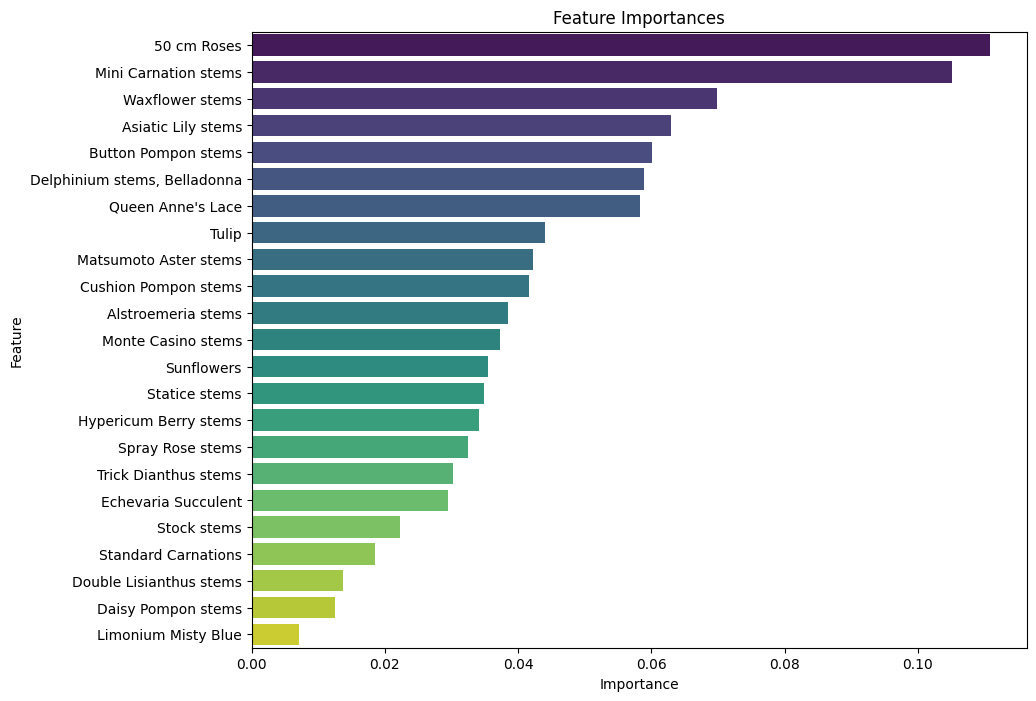

In [25]:
# Select only the columns corresponding to 'Flowers'
X_flowers = top_25_encoded.filter(regex='Flowers')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_flowers_imputed = imputer.fit_transform(X_flowers)

# Create a DataFrame from the imputed data
X_flowers_imputed_df = pd.DataFrame(X_flowers_imputed, columns=X_flowers.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_flowers_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_flowers.columns,
    'Importance': importances
})

# Print the importances of each unique flower
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Flowers_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Flowers_', '')

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


            Feature  Importance
4   Colors_lavender    0.170887
1      Colors_green    0.164653
9        Colors_red    0.144399
6      Colors_peach    0.120700
0       Colors_blue    0.085124
7       Colors_pink    0.063892
8     Colors_purple    0.059041
10     Colors_white    0.055335
11    Colors_yellow    0.045474
2   Colors_hot pink    0.040225
5     Colors_orange    0.025669
3      Colors_ivory    0.024602


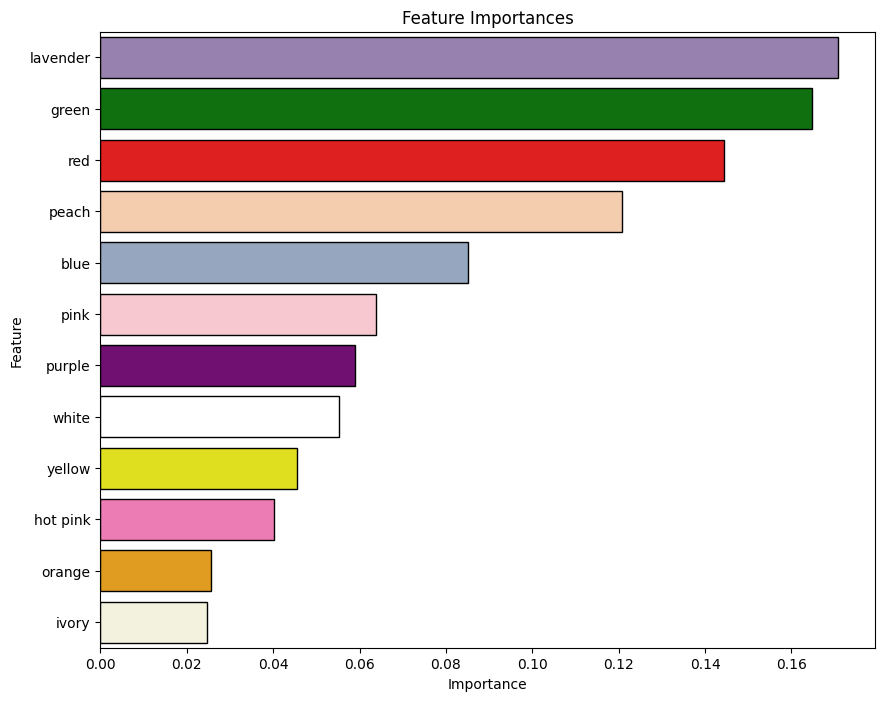

In [26]:
# Select only the columns corresponding to 'Colors'
X_colors = top_25_encoded.filter(regex='Colors')

# Impute missing values with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
X_colors_imputed = imputer.fit_transform(X_colors)

# Create a DataFrame from the imputed data
X_colors_imputed_df = pd.DataFrame(X_colors_imputed, columns=X_colors.columns)

# Fit a Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X_colors_imputed_df, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'Feature': X_colors.columns,
    'Importance': importances
})

# Print the importances of each unique color
print(importances_df.sort_values(by='Importance', ascending=False))
# Sort the DataFrame by importance
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
# Remove 'Colors_' prefix from feature names
importances_df_sorted['Feature'] = importances_df_sorted['Feature'].str.replace('Colors_', '')

# Create a list of colors for the barplot
colors = [custom_colors.get(feature, 'gray') for feature in importances_df_sorted['Feature']]

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette=colors, edgecolor='black')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
